In [1]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *

from django.db.models import Count, Sum

# Define the query
q = Query.objects.get(pk=6230)

# And give the id of the topic model
run_id = 1621
stat = RunStats.objects.get(pk=run_id)

In [23]:
i = 0
# Loop through the categories
for c in q.project.category_set.all():
    print(c.name)
    # The docs are those that have been rated relevant in a query part of that category
    dos = DocOwnership.objects.filter(
        query__category=c,
        relevant=1
    )
    doc_ids = set(dos.values_list('doc__pk',flat=True))
    docs = Doc.objects.filter(pk__in=doc_ids)
    if not docs.exists():
        print(f"There are no documents for the category {c.name}")
        continue
    # These objects link the docs to the topics in this run
    dts = DocTopic.objects.filter(
        run_id=run_id,doc__in=doc_ids
    ).values('topic__title').annotate(
        score = Sum('score')
    ).order_by('topic__id')
    tdf = pd.DataFrame.from_dict(list(dts))
    tdf['category'] = c.name
    if i==0:
        ldf = tdf
    else:
        ldf = pd.concat([ldf,tdf])
    i+=1
ldf.head()

Carbonates production
There are no documents for the category Carbonates production
EOR
Methane
Enhanced weatehring
There are no documents for the category Enhanced weatehring
Other mineralisation products
EGR/CBM
Polymers and bioplastics
Other mineralisation chemicals (no carbonates)
There are no documents for the category Other mineralisation chemicals (no carbonates)
Acetic acid
Formic acid
Synthesis gas
C fiber and graphene
Biofuel from algae
OME
general CCU
There are no documents for the category general CCU
Desalination
Other chemicals
There are no documents for the category Other chemicals
Other products
There are no documents for the category Other products
Ocean 
There are no documents for the category Ocean 
Urea
DME
Methanol
Cement/concrete production


,score,topic__title,category
0,0.505742,"{exergy, photocatalytic, visible}",EOR
1,8.478787,"{microalgae, energy, use}",EOR
2,120.375029,"{co2, reservoir, injection}",EOR
3,77.181368,"{co2, process, use}",EOR
4,6.173714,"{emission, cycle, life}",EOR


In [28]:
# 'Spread' in tidyverse language the data so that topics become columns
df = ldf.pivot(index="category",columns="topic__title",values="score")#.reset_index()
df.head()

topic__title,"{carbonation, cement, concrete}","{carbonation, reaction, co2}","{co2, high, catalyst}","{co2, process, use}","{co2, rate, biomass}","{co2, reservoir, injection}","{emission, cycle, life}","{exergy, photocatalytic, visible}","{microalgae, energy, use}","{waste, wind, suspension}"
category,,,,,,,,,,
Acetic acid,0.192019,0.519007,3.644301,5.803059,6.316628,0.052804,0.291660,0.044963,9.025641,0.109919
Biofuel from algae,1.888002,5.177157,6.780653,56.735352,130.648085,5.851655,5.100991,0.529667,167.168428,1.120010
C fiber and graphene,0.400266,1.344274,9.842635,2.160159,0.310272,0.333631,0.062689,0.141833,2.380559,0.023683
Cement/concrete production,234.540103,139.232834,17.536840,65.473270,7.553322,16.180052,4.710373,0.755642,26.294133,2.723432
DME,0.135671,0.064173,2.537222,7.671427,0.455421,0.039150,0.330577,0.017184,2.699589,0.049586


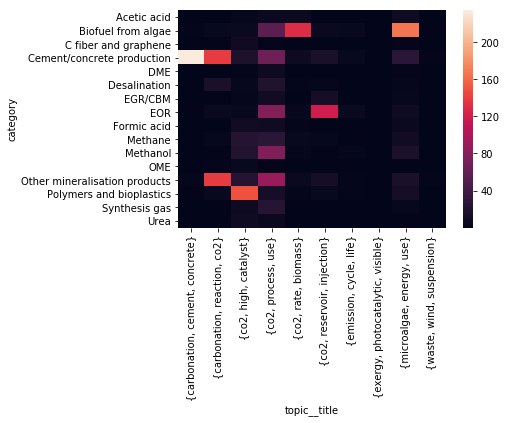

In [30]:
# Here's a simple heatmap
import seaborn as sns
ax = sns.heatmap(df)

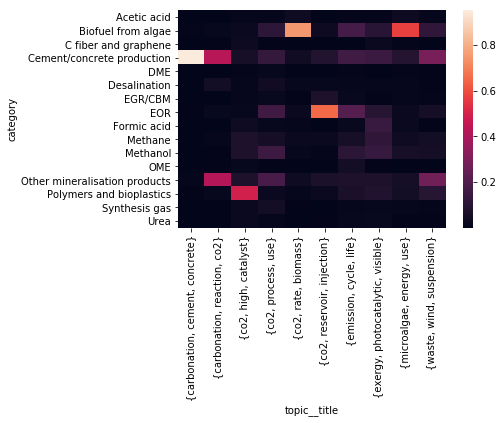

In [50]:
## Perhaps we want to show category scores as a percentage of each topic
ldf['topic_share'] = ldf['score'] / ldf.topic__title.map(ldf.groupby('topic__title')['score'].sum())
df = ldf.pivot(index="category",columns="topic__title",values="topic_share")#.reset_index()
# Here's the map showing the category-topic score as a share of that topics total scores
import seaborn as sns
ax = sns.heatmap(df)

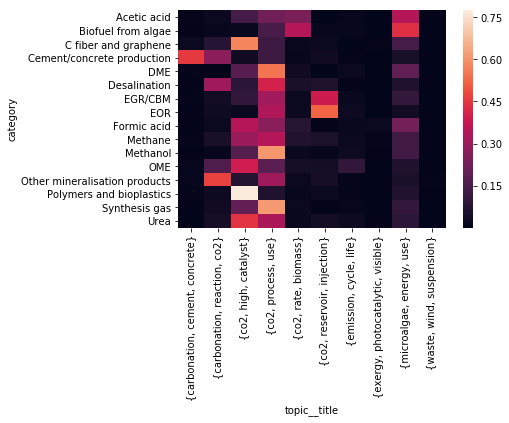

In [51]:
## And the other way round, if we want to show the proportion of each category in each topic
ldf['cat_share'] = ldf['score'] / ldf.category.map(ldf.groupby('category')['score'].sum())
df = ldf.pivot(index="category",columns="topic__title",values="cat_share")#.reset_index()
# Here's the map showing the category-topic score as a share of that topics total scores
import seaborn as sns
ax = sns.heatmap(df)